In [1]:
% matplotlib inline

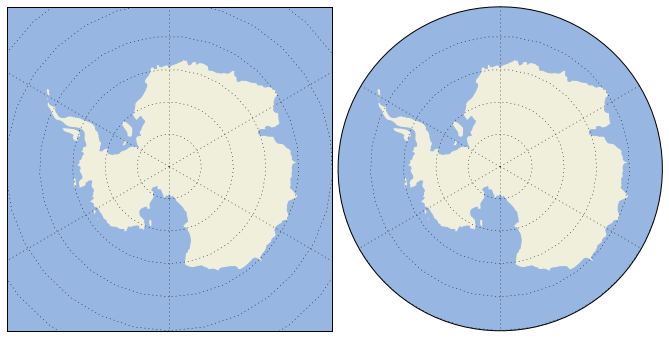

In [2]:
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature


def main():
    fig = plt.figure(figsize=[10, 5])
    ax1 = plt.subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
    ax2 = plt.subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(), sharex=ax1, sharey=ax1)
    fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

    # Limit the map to -60 degrees latitude and below.
    ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

    ax1.add_feature(cartopy.feature.LAND)
    ax1.add_feature(cartopy.feature.OCEAN)

    ax1.gridlines()
    ax2.gridlines()

    ax2.add_feature(cartopy.feature.LAND)
    ax2.add_feature(cartopy.feature.OCEAN)

    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax2.set_boundary(circle, transform=ax2.transAxes)

    plt.show()


if __name__ == '__main__':
    main()